In [ ]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
custom_colors = ['#3E57C1', '#A25A00', '#B6B6B6', '#B533FF', '#27D86C', 
                 '#EFCB10', '#EA1F15', '#FC00FF', '#3CC3B3', '#4A4A4A']
genres = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
color_dict = dict(zip(genres, custom_colors))

df = pd.read_csv('features.csv')
df.head()

,name,genre,zcr,spectral_centroid,spectral_bandwidth,spectral_flatness
0,jazz.00013.wav,jazz,0.061076,1790.243640,2313.009872,0.003274
1,jazz.00014.wav,jazz,0.064918,1171.834590,1278.026764,0.000289
2,jazz.00021.wav,jazz,0.181372,2915.202078,2420.424422,0.018824
3,jazz.00026.wav,jazz,0.058610,1367.435200,1638.954923,0.002451
4,jazz.00085.wav,jazz,0.147559,2860.683151,2566.170784,0.044342


In [33]:
def print_grouped_stats(audio, column_name):    
    grouped_data = audio.groupby('genre')[column_name].agg(['mean', 'std'])
    
    print(f"Mean and Standard Deviation of '{column_name}' by Genre:")
    print(grouped_data)

print_grouped_stats(df, "spectral_centroid")
print_grouped_stats(df, "spectral_bandwidth")
print_grouped_stats(df, "spectral_flatness")
print_grouped_stats(df, "zcr")

Mean and Standard Deviation of 'spectral_centroid' by Genre:
                  mean         std
genre                             
blues      1741.889314  502.914960
classical  1371.128917  347.868128
country    1864.931816  555.215804
disco      2610.612244  487.882476
hiphop     2491.255967  461.663726
jazz       1839.774204  732.413158
metal      2584.941165  388.703071
pop        3100.756327  571.845754
reggae     2137.265183  579.698134
rock       2278.676056  507.966202
Mean and Standard Deviation of 'spectral_bandwidth' by Genre:
                  mean         std
genre                             
blues      1937.537307  318.140729
classical  1523.480457  255.132441
country    2076.322039  424.296847
disco      2499.491774  369.436638
hiphop     2494.244737  335.669906
jazz       2060.716173  587.737326
metal      2232.596488  208.922237
pop        3002.718847  317.004795
reggae     2287.322702  380.614465
rock       2281.408128  347.672988
Mean and Standard Deviation of 'spect

In [ ]:
custom_names = ['Spectral Centroid', 'Spectral Bandwidth', 'Spectral Flatness', 'Zero Crossing Rate']
cols = ['spectral_centroid', 'spectral_bandwidth', 'spectral_flatness', 'zcr']
column_dict = dict(zip(cols, custom_names))

for col in cols:
    plt.figure(figsize=(10, 6))
    for genre in genres:
        subset = df[df['genre'] == genre]
        sns.kdeplot(subset[col], label=genre, color=color_dict[genre])
    plt.title(f'KDE of {column_dict[col]} by Genre')
    plt.xlabel(column_dict[col])
    plt.ylabel('Density')
    plt.legend()
    plt.show()

Tests for variable: spectral_centroid
blues - Normality test for spectral_centroid: Statistics=0.9546767473220825, p-value=0.0128390584141016
classical - Normality test for spectral_centroid: Statistics=0.9332022666931152, p-value=0.0010543803218752146
country - Normality test for spectral_centroid: Statistics=0.924107015132904, p-value=0.0004010454285889864
disco - Normality test for spectral_centroid: Statistics=0.9756664037704468, p-value=0.18983304500579834
hiphop - Normality test for spectral_centroid: Statistics=0.9812114834785461, p-value=0.37595275044441223
jazz - Normality test for spectral_centroid: Statistics=0.9159636497497559, p-value=0.00019598568906076252
metal - Normality test for spectral_centroid: Statistics=0.9782240986824036, p-value=0.2620583474636078
pop - Normality test for spectral_centroid: Statistics=0.9789270162582397, p-value=0.2858133018016815
reggae - Normality test for spectral_centroid: Statistics=0.8923325538635254, p-value=1.956253981916234e-05
rock - 

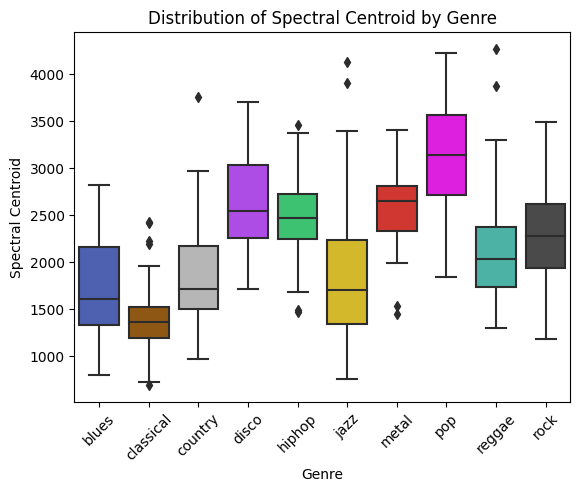

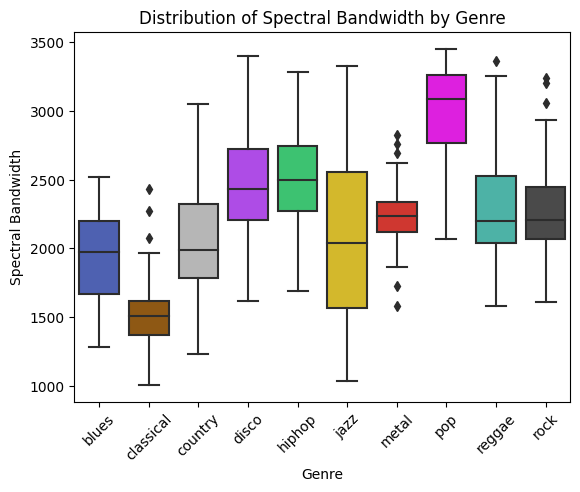

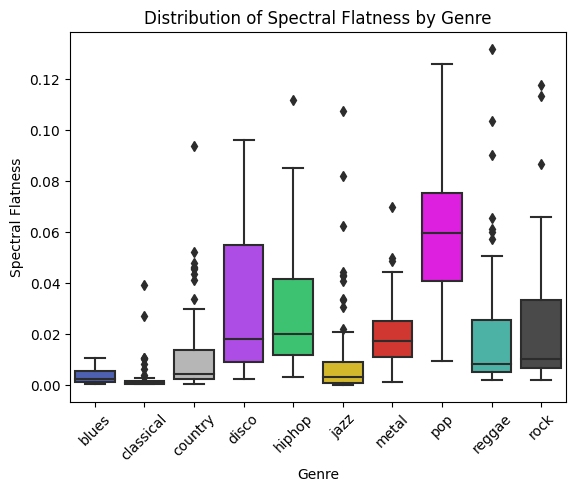

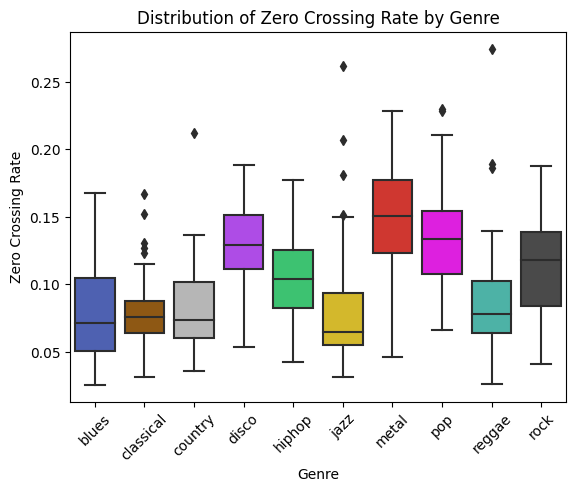

In [34]:
for col in cols:
    print(f"Tests for variable: {col}")
    # Normality test
    for genre in genres:
        stat, p = stats.shapiro(df[df['genre'] == genre][col])
        print(f"{genre} - Normality test for {col}: Statistics={stat}, p-value={p}")
    
    # Homogeneity of variances test
    stat, p = stats.levene(*[df[df['genre'] == genre][col] for genre in genres])
    print(f"Levene's Test for {col}: Statistics={stat}, p-value={p}")

    # Choosing and performing the statistical test
    if col != "spectral_flatness":  # If variances are equal, we use ANOVA
        fvalue, pvalue = stats.f_oneway(*[df[df['genre'] == genre][col] for genre in genres])
        print(f"ANOVA on {col}: F-value={fvalue}, p-value={pvalue}")
    else:  # If variances are not equal, use Kruskal-Wallis
        k_stat, k_p = stats.kruskal(*[df[df['genre'] == genre][col] for genre in genres])
        print(f"Kruskal-Wallis on {col}: H-statistic={k_stat}, p-value={k_p}")

# Visualization
for col in cols:
    sns.boxplot(x='genre', y=col, data=df, palette=color_dict, order=genres)
    plt.title(f"Distribution of {column_dict[col]} by Genre")
    plt.ylabel(column_dict[col])
    plt.xlabel("Genre")
    plt.xticks(rotation=45)
    plt.show()